In [93]:
import pandas as pd 
# for array computations and loading data
import numpy as np

# for building linear regression models and preparing data
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# for building and training neural networks
import tensorflow as tf

# custom functions
import utils

# reduce display precision on numpy arrays
np.set_printoptions(precision=2)

# suppress warnings
tf.get_logger().setLevel('ERROR')
tf.autograph.set_verbosity(0)
d=pd.read_csv("x.csv")


In [94]:
x=d["YearsExperience"]
y=d["Salary"]
x = np.expand_dims(x, axis=1)
y = np.expand_dims(y, axis=1)

<AxesSubplot:>

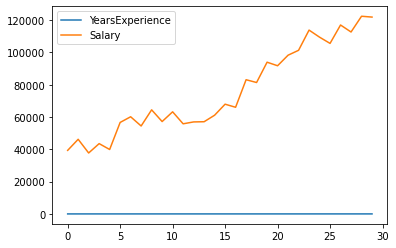

In [95]:
d.plot()

In [105]:
# Get 60% of the dataset as the training set. Put the remaining 40% in temporary variables: x_ and y_.
x_train, x_, y_train, y_ = train_test_split(x, y, test_size=0.40, random_state=1)

# Split the 40% subset above into two: one half for cross validation and the other for the test set
x_cv, x_test, y_cv, y_test = train_test_split(x_, y_, test_size=0.50, random_state=1)

model = LinearRegression()

# Train the model
model.fit(x_train, y_train )
y_train_pred = model.predict(x_train)

# Predictions for the cross-validation set
y_cv_pred = model.predict(x_cv)

# Delete temporary variables
del x_, y_

print(f"the shape of the training set (input) is: {x_train.shape}")
print(f"the shape of the training set (target) is: {y_train.shape}\n")
print(f"the shape of the cross validation set (input) is: {x_cv.shape}")
print(f"the shape of the cross validation set (target) is: {y_cv.shape}\n")
print(f"the shape of the test set (input) is: {x_test.shape}")
print(f"the shape of the test set (target) is: {y_test.shape}")

the shape of the training set (input) is: (18, 1)
the shape of the training set (target) is: (18, 1)

the shape of the cross validation set (input) is: (6, 1)
the shape of the cross validation set (target) is: (6, 1)

the shape of the test set (input) is: (6, 1)
the shape of the test set (target) is: (6, 1)


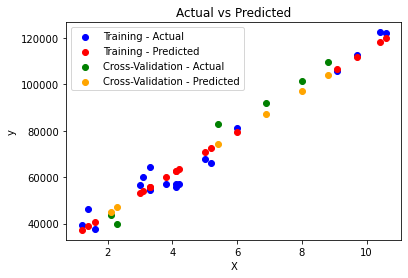

In [106]:
import numpy as np
import matplotlib.pyplot as plt
plt.scatter(x_train, y_train, color='blue', label='Training - Actual')
plt.scatter(x_train, y_train_pred, color='red', label='Training - Predicted')
plt.scatter(x_cv, y_cv, color='green', label='Cross-Validation - Actual')
plt.scatter(x_cv, y_cv_pred, color='orange', label='Cross-Validation - Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

C:\Users\USER11\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:1652: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes': 4 instead of 5.
  warnings.warn(


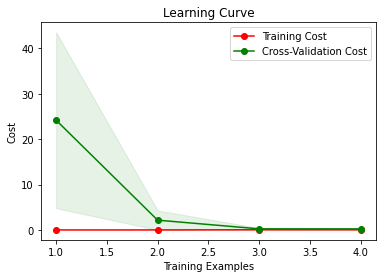

In [109]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, cv_scores = learning_curve(
    model, X_data, y_data, cv=5, scoring='neg_mean_squared_error')

mean_train_scores = -np.mean(train_scores, axis=1)
std_train_scores = np.std(train_scores, axis=1)
mean_cv_scores = -np.mean(cv_scores, axis=1)
std_cv_scores = np.std(cv_scores, axis=1)

# Plot the learning curve
plt.figure()
plt.plot(train_sizes, mean_train_scores, 'o-', color='r', label='Training Cost')
plt.fill_between(train_sizes, mean_train_scores - std_train_scores,
                 mean_train_scores + std_train_scores, alpha=0.1, color='r')
plt.plot(train_sizes, mean_cv_scores, 'o-', color='g', label='Cross-Validation Cost')
plt.fill_between(train_sizes, mean_cv_scores - std_cv_scores,
                 mean_cv_scores + std_cv_scores, alpha=0.1, color='g')
plt.xlabel('Training Examples')
plt.ylabel('Cost')
plt.title('Learning Curve')
plt.legend()
plt.show()

In [100]:
scaler_linear = StandardScaler()

# Compute the mean and standard deviation of the training set then transform it
X_train_scaled = scaler_linear.fit_transform(x_train)

print(f"Computed mean of the training set: {scaler_linear.mean_.squeeze():.2f}")
print(f"Computed standard deviation of the training set: {scaler_linear.scale_.squeeze():.2f}")

# Plot the results


Computed mean of the training set: 4.95
Computed standard deviation of the training set: 2.95


In [114]:
linear_model = LinearRegression()

# Train the model
linear_model.fit(x_train, y_train )

LinearRegression()

In [115]:
yhat = linear_model.predict(x_train)

# Use scikit-learn's utility function and divide by 2
print(f"training MSE (using sklearn function): {mean_squared_error(y_train, yhat) / 2}")



training MSE (using sklearn function): 11198007.004136525


In [116]:
X_cv_scaled = scaler_linear.transform(x_cv)

print(f"Mean used to scale the CV set: {scaler_linear.mean_.squeeze():.2f}")
print(f"Standard deviation used to scale the CV set: {scaler_linear.scale_.squeeze():.2f}")

# Feed the scaled cross validation set
yhat = linear_model.predict(X_cv_scaled)

# Use scikit-learn's utility function and divide by 2
print(f"Cross validation MSE: {mean_squared_error(y_cv, yhat) / 2}")

Mean used to scale the CV set: 4.95
Standard deviation used to scale the CV set: 2.95
Cross validation MSE: 1413934513.300917


In [117]:
poly = PolynomialFeatures(degree=2, include_bias=False)

# Compute the number of features and transform the training set
X_train_mapped = poly.fit_transform(x_train)

# Preview the first 5 elements of the new training set. Left column is `x` and right column is `x^2`
# Note: The `e+<number>` in the output denotes how many places the decimal point should 
# be moved. For example, `3.24e+03` is equal to `3240`
print(X_train_mapped[:5])

[[ 1.6   2.56]
 [ 9.1  82.81]
 [ 3.1   9.61]
 [ 6.   36.  ]
 [ 4.2  17.64]]


In [118]:
# Instantiate the class
scaler_poly = StandardScaler()

# Compute the mean and standard deviation of the training set then transform it
X_train_mapped_scaled = scaler_poly.fit_transform(X_train_mapped)

# Preview the first 5 elements of the scaled training set.
print(X_train_mapped_scaled[:5])

[[-1.14 -0.83]
 [ 1.41  1.35]
 [-0.63 -0.64]
 [ 0.36  0.08]
 [-0.25 -0.42]]


In [119]:
# Initialize the class
model = LinearRegression()

# Train the model
model.fit(X_train_mapped_scaled, y_train )

# Compute the training MSE
yhat = model.predict(X_train_mapped_scaled)
print(f"Training MSE: {mean_squared_error(y_train, yhat) / 2}")

# Add the polynomial features to the cross validation set
X_cv_mapped = poly.transform(x_cv)

# Scale the cross validation set using the mean and standard deviation of the training set
X_cv_mapped_scaled = scaler_poly.transform(X_cv_mapped)

# Compute the cross validation MSE
yhat = model.predict(X_cv_mapped_scaled)
print(f"Cross validation MSE: {mean_squared_error(y_cv, yhat) / 2}")

Training MSE: 8525397.765776107
Cross validation MSE: 29464182.872845713


In [120]:
# Initialize lists containing the lists, models, and scalers
train_mses = []
cv_mses = []
models = []
scalers = []

# Loop over 10 times. Each adding one more degree of polynomial higher than the last.
for degree in range(1,11):
    
    # Add polynomial features to the training set
    poly = PolynomialFeatures(degree, include_bias=False)
    X_train_mapped = poly.fit_transform(x_train)
    
    # Scale the training set
    scaler_poly = StandardScaler()
    X_train_mapped_scaled = scaler_poly.fit_transform(X_train_mapped)
    scalers.append(scaler_poly)
    
    # Create and train the model
    model = LinearRegression()
    model.fit(X_train_mapped_scaled, y_train )
    models.append(model)
    
    # Compute the training MSE
    yhat = model.predict(X_train_mapped_scaled)
    train_mse = mean_squared_error(y_train, yhat) / 2
    train_mses.append(train_mse)
    
    # Add polynomial features and scale the cross validation set
    poly = PolynomialFeatures(degree, include_bias=False)
    X_cv_mapped = poly.fit_transform(x_cv)
    X_cv_mapped_scaled = scaler_poly.transform(X_cv_mapped)
    
    # Compute the cross validation MSE
    yhat = model.predict(X_cv_mapped_scaled)
    cv_mse = mean_squared_error(y_cv, yhat) / 2
    cv_mses.append(cv_mse)
    
# Plot the results
degrees=range(1,11)


In [121]:
# Get the model with the lowest CV MSE (add 1 because list indices start at 0)
# This also corresponds to the degree of the polynomial added
degree = np.argmin(cv_mses) + 1
print(f"Lowest CV MSE is found in the model with degree={degree}")

Lowest CV MSE is found in the model with degree=1


In [122]:
poly = PolynomialFeatures(degree, include_bias=False)
X_test_mapped = poly.fit_transform(x_test)

# Scale the test set
X_test_mapped_scaled = scalers[degree-1].transform(X_test_mapped)

# Compute the test MSE
yhat = models[degree-1].predict(X_test_mapped_scaled)
test_mse = mean_squared_error(y_test, yhat) / 2

print(f"Training MSE: {train_mses[degree-1]:.2f}")
print(f"Cross Validation MSE: {cv_mses[degree-1]:.2f}")
print(f"Test MSE: {test_mse:.2f}")

Training MSE: 11198007.00
Cross Validation MSE: 16622305.18
Test MSE: 44113426.24
